# EDA and Prediction of Stresses

### Here, we will research the dataset related to FEM (Finite Element Method), where we try to analyse and then predict the values for stress. 

### Different ML models, as well as Deep Learning models, will be implemented for the prediction. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, f_classif, SelectKBest, SelectPercentile
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from keras.models import Sequential
from keras.layers import Dense 

from sklearn import metrics


In [2]:
# import the dataset

df_main = pd.read_csv(r'1000randoms.csv')

# look at the first rows
df_main.head()

Sample       ecc           N   gammaG     Esoil        Econc      Dbot  \
0       1   0.00000  2484.45731  0.98520  53.35714  33100.78741  22.69187   
1       2  12.05251  2484.45731  0.98520  53.35714  33100.78741  22.69187   
2       3  17.22569  2484.45731  0.98520  53.35714  33100.78741  22.69187   
3       4  23.86851  2484.45731  0.98520  53.35714  33100.78741  22.69187   
4       5   0.00000  2464.37170  1.03556  93.10015  35409.90671  22.27972   

        H1       H2       H3      Mr_t      Mt_t      Mr_c      Mt_c  
0  1.01748  1.06402  1.49867  0.133729  0.086570  0.133729  0.086570  
1  1.01748  1.06402  1.49867 -1.231619 -0.409107  1.580653  0.993389  
2  1.01748  1.06402  1.49867 -1.798073 -0.709641  2.197034  1.298750  
3  1.01748  1.06402  1.49867 -2.518479 -1.121789  2.975495  1.686231  
4  1.13818  1.01188  0.85739  0.101952  0.070906  0.101952  0.070906

In [3]:
# look at the final rows
df_main.tail()

Sample       ecc           N   gammaG     Esoil        Econc      Dbot  \
995     996  22.50064  3233.51170  1.04286  65.26809  34159.86802  20.03787   
996     997   0.00000  4801.55765  0.90074  87.82889  32894.31444  20.52075   
997     998  12.72058  4801.55765  0.90074  87.82889  32894.31444  20.52075   
998     999  18.83597  4801.55765  0.90074  87.82889  32894.31444  20.52075   
999    1000  25.62625  4801.55765  0.90074  87.82889  32894.31444  20.52075   

          H1       H2       H3      Mr_t      Mt_t      Mr_c      Mt_c  
995  1.04506  1.18946  0.92932 -2.553663 -1.308678  3.696044  2.094521  
996  1.51599  1.17558  1.46543  0.112376  0.082909  0.112376  0.082909  
997  1.51599  1.17558  1.46543 -1.798456 -0.897256  4.015062  2.217156  
998  1.51599  1.17558  1.46543 -3.078718 -1.631869  5.331330  2.916469  
999  1.51599  1.17558  1.46543 -3.939210 -2.410950  7.227551  3.717581

In [4]:
# look at the shape
print('The shape is: {}'.format(df_main.shape))

The shape is: (1000, 14)


In [5]:
# explore the main information
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sample  1000 non-null   int64  
 1   ecc     1000 non-null   float64
 2   N       1000 non-null   float64
 3   gammaG  1000 non-null   float64
 4   Esoil   1000 non-null   float64
 5   Econc   1000 non-null   float64
 6   Dbot    1000 non-null   float64
 7   H1      1000 non-null   float64
 8   H2      1000 non-null   float64
 9   H3      1000 non-null   float64
 10  Mr_t    1000 non-null   float64
 11  Mt_t    1000 non-null   float64
 12  Mr_c    1000 non-null   float64
 13  Mt_c    1000 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 109.5 KB


In [6]:
# look at the missing values
df_main.isna().mean()

Sample    0.0
ecc       0.0
N         0.0
gammaG    0.0
Esoil     0.0
Econc     0.0
Dbot      0.0
H1        0.0
H2        0.0
H3        0.0
Mr_t      0.0
Mt_t      0.0
Mr_c      0.0
Mt_c      0.0
dtype: float64

In [7]:
# look at the percentage of duplicated values

df_main.duplicated().mean()

0.0

In [8]:
# looking at statistical data

df_main.describe()

Sample          ecc            N       gammaG        Esoil  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    13.505678  3534.451046     0.996259    77.529151   
std     288.819436     8.809854   882.341655     0.055444    24.975897   
min       1.000000     0.000000  2001.620110     0.900260    35.208290   
25%     250.750000     7.513590  2726.021640     0.949420    56.180760   
50%     500.500000    15.500830  3611.351895     0.998115    77.759420   
75%     750.250000    20.251790  4308.607900     1.040720    99.228270   
max    1000.000000    25.990080  4987.486220     1.099790   118.551940   

              Econc         Dbot           H1           H2           H3  \
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   33430.625405    20.459594     1.208397     1.485011     1.215343   
std     2042.570603     1.390192     0.232068     0.296533     0.231364   
min    30054.161790    18.008770     0.800450     1.006210     0.807820   
25%    31485.932910    19.266290     1.034380     1.211360     1.023330   
50%    33454.730445    20.552740     1.211540     1.486085     1.251735   
75%    35274.470300    21.647700     1.406920     1.738110     1.413470   
max    36977.723190    22.918060     1.598400     1.994710     1.598340   

              Mr_t         Mt_t         Mr_c         Mt_c  
count  1000.000000  1000.000000  1000.000000  1000.000000  
mean     -1.766404    -0.807850     2.485259     1.575196  
std       1.314094     0.696360     1.813876     1.026022  
min      -4.978701    -2.536163     0.067049     0.043397  
25%      -2.693054    -1.301825     0.315496     0.645445  
50%      -1.952675    -0.800057     2.509531     1.717396  
75%      -0.404063    -0.045443     3.774859     2.292633  
max       0.303619     0.241073     7.418611     3.979341

## Data Visualization

  The histogram for Sample


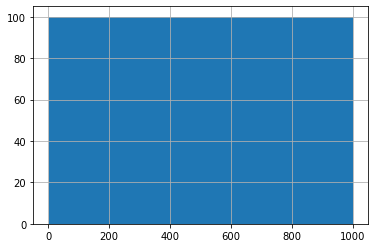

  The histogram for ecc


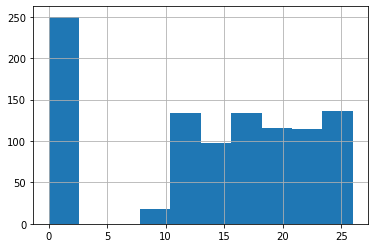

  The histogram for N


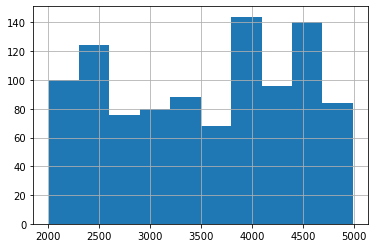

  The histogram for gammaG


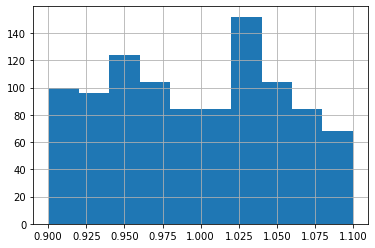

  The histogram for Esoil


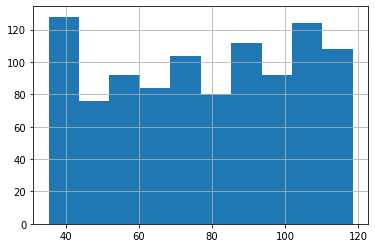

  The histogram for Econc


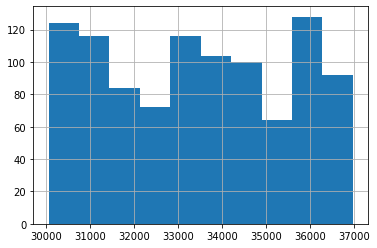

  The histogram for Dbot


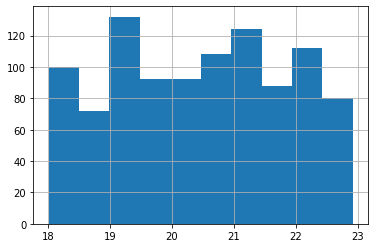

  The histogram for H1


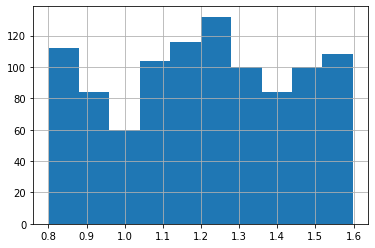

  The histogram for H2


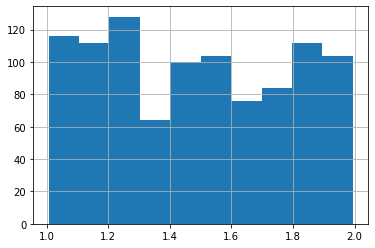

  The histogram for H3


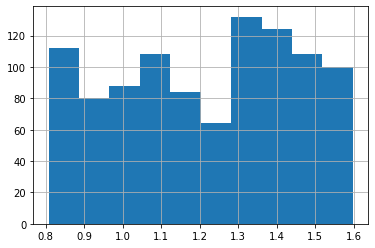

  The histogram for Mr_t


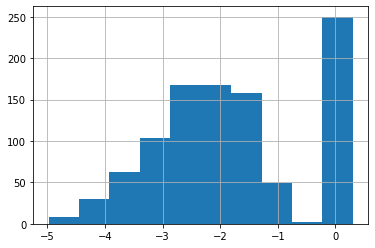

  The histogram for Mt_t


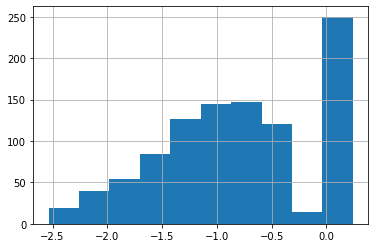

  The histogram for Mr_c


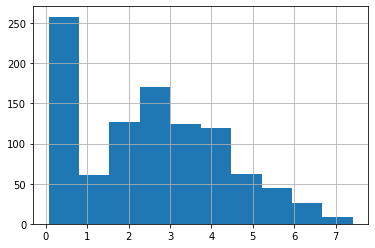

  The histogram for Mt_c


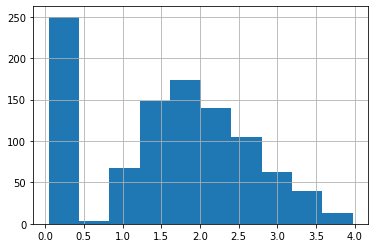

In [9]:
# plotting the histograms of the columns
for i in df_main.columns:
    print('\033[1m \033[94m \033[4m' +  'The histogram for {}'.format(i) + '\033[0m')
    df_main[i].hist()
    plt.show()

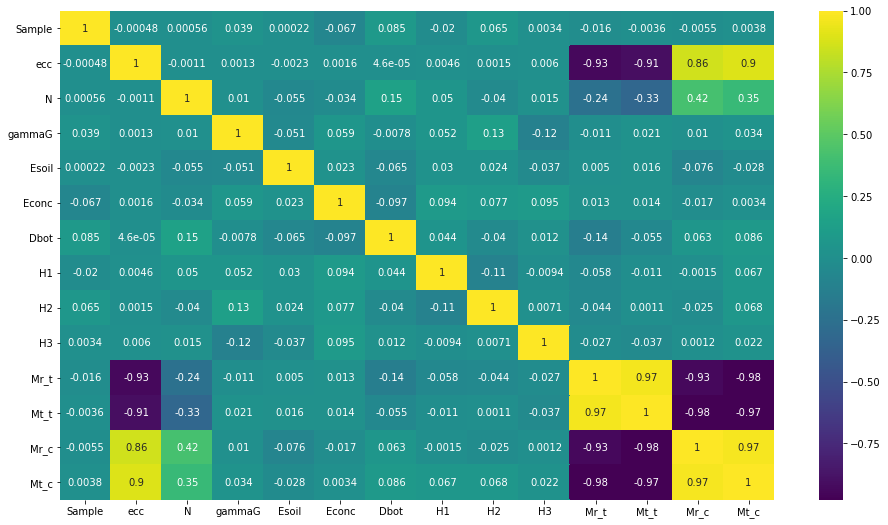

In [10]:
# plotting the heatmap for correlation

plt.figure(figsize=(16,9))
ax = sns.heatmap(df_main.corr(),annot = True,cmap = 'viridis')
plt.show()

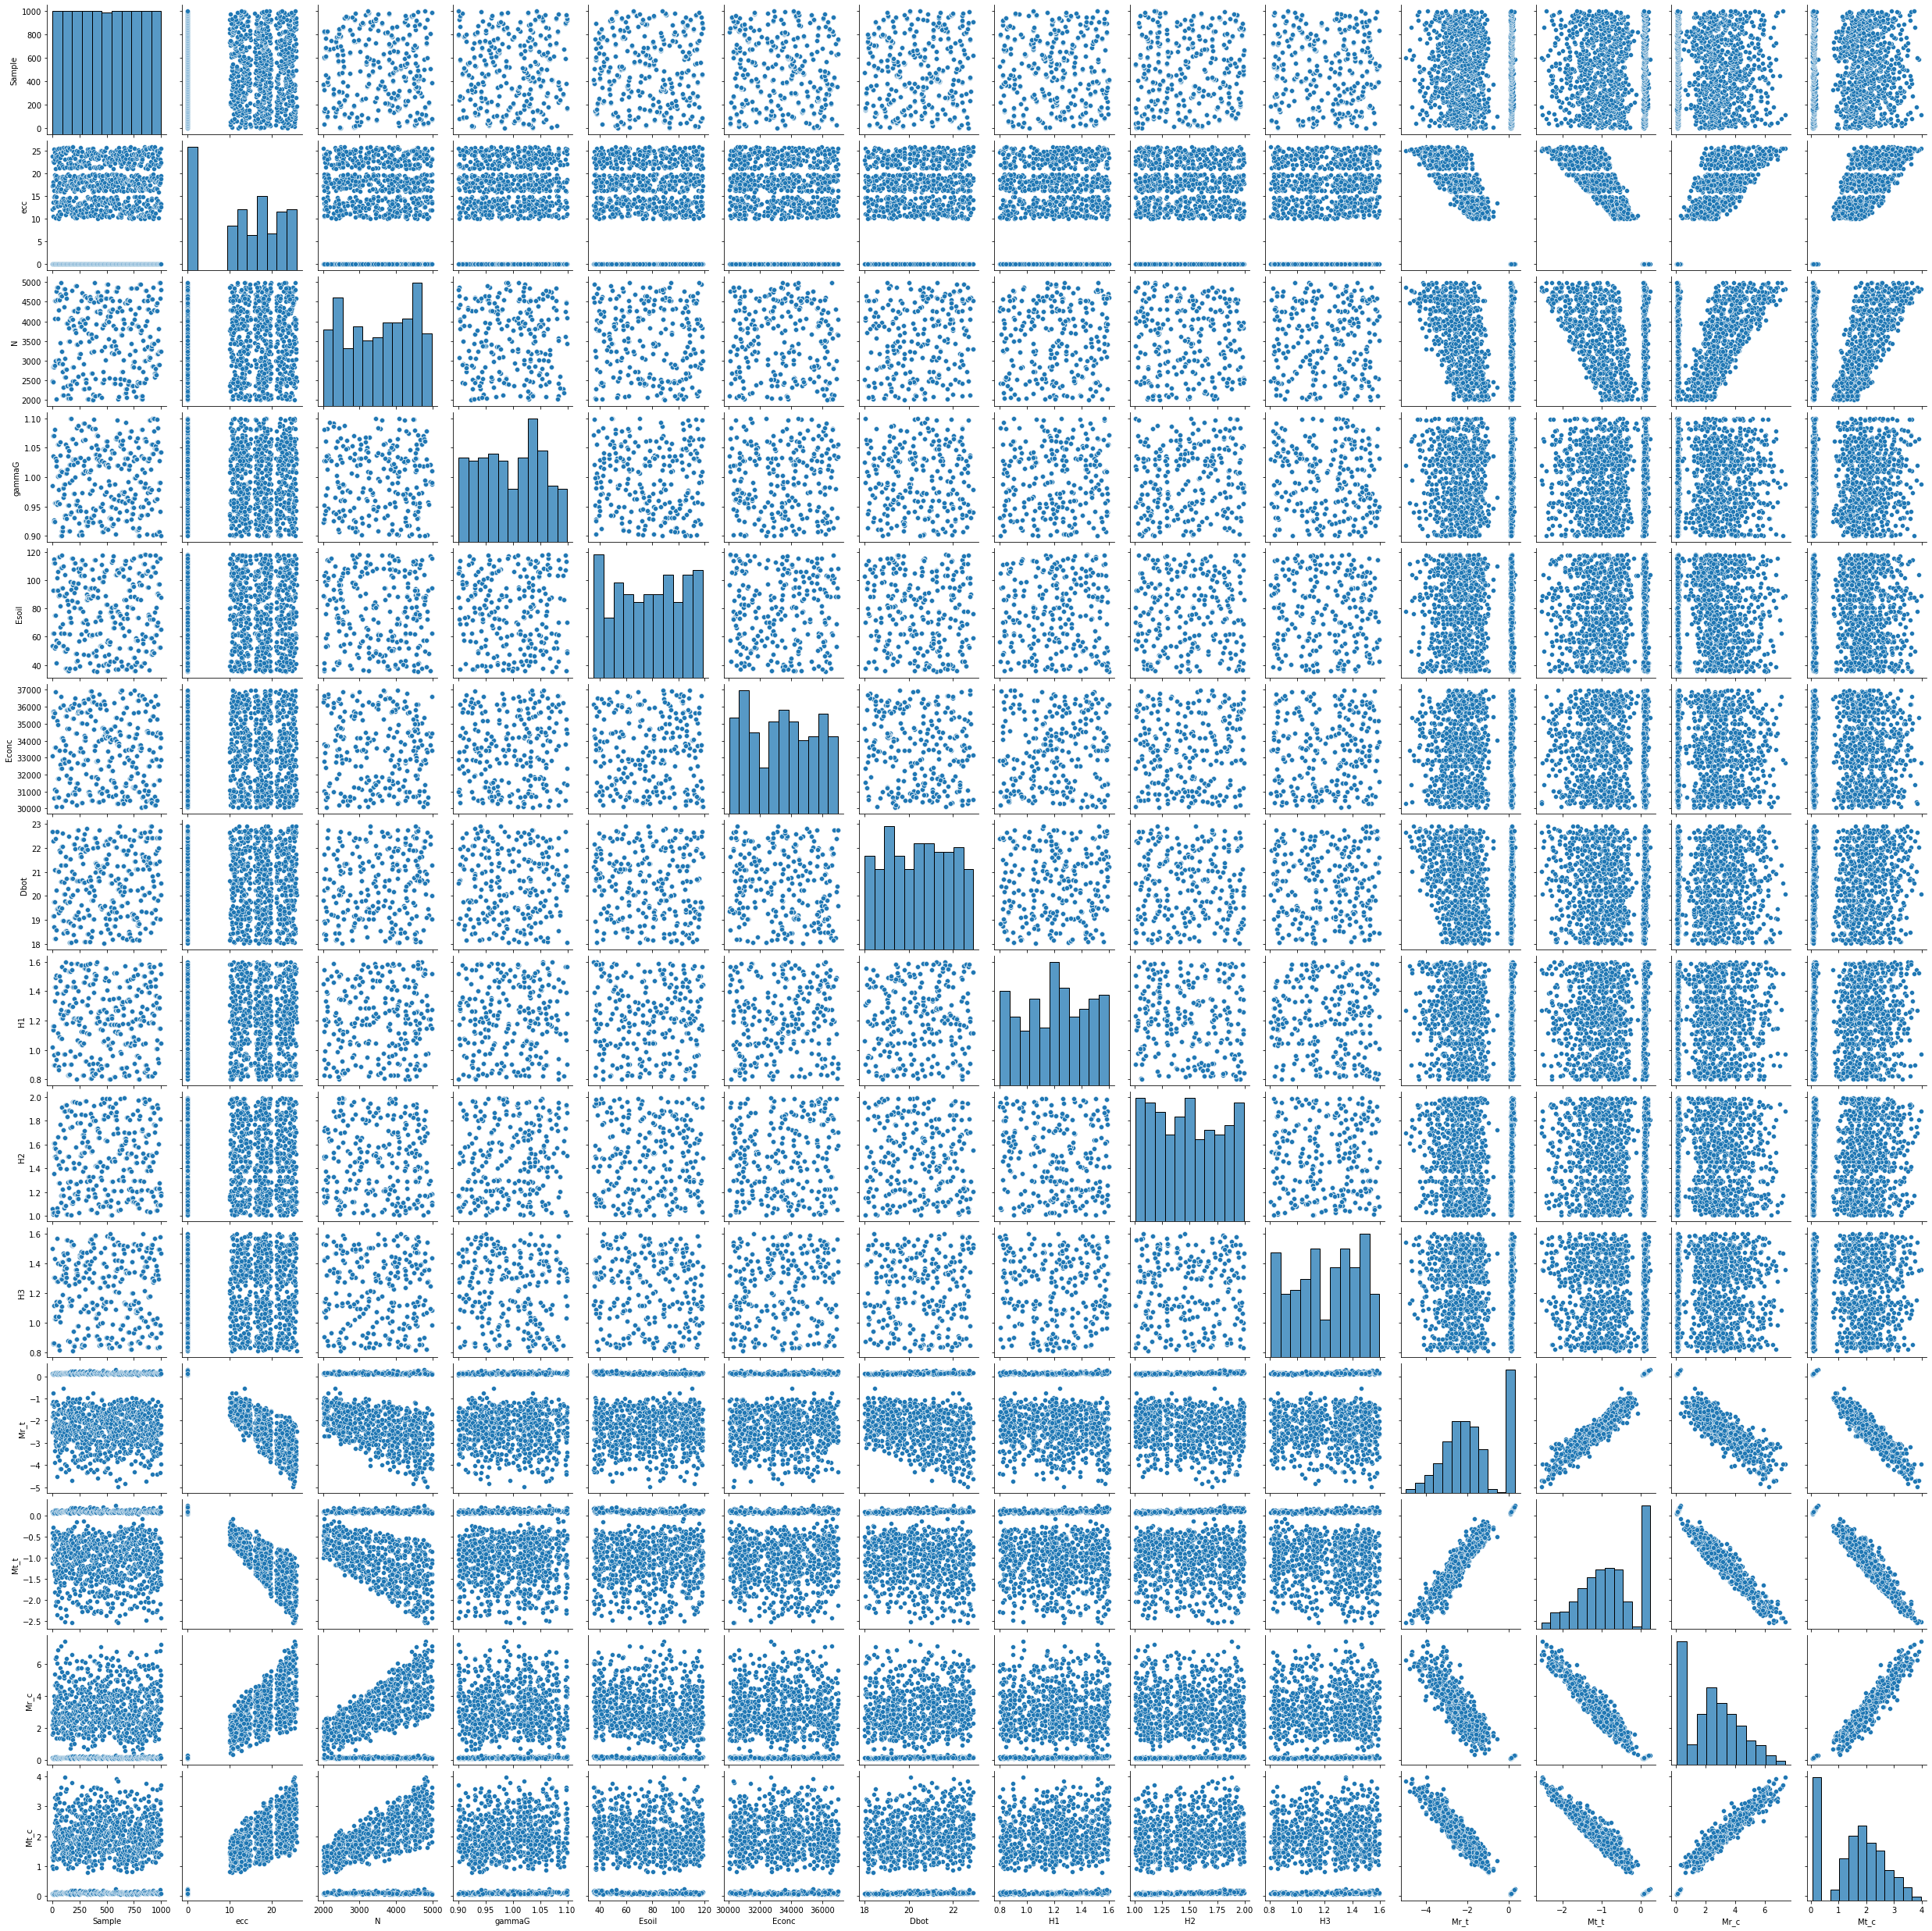

In [11]:
# plotting the scatter plots

sns.pairplot(df_main)

## Preprocessing 

In [12]:
# splitting into train and test sets: 

X = ['ecc', 'N', 'gammaG', 'Esoil', 'Econc', 'Dbot', 'H1', 'H2', 'H3']
Y = ['Mr_t', 'Mt_t', 'Mr_c', 'Mt_c']
X = df_main[X]
Y = df_main[Y]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((700, 9), (300, 9))

## ML prediction 

### First, we try to predict the values for the whole dataset

In [13]:
def error_display(y_test, y_pred):
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

### Linear Regression

In [14]:
# defining the Linear Regression algorithm
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred

array([[-1.43614589, -0.6729516 ,  2.3426887 ,  1.30667273],
       [-4.04840386, -2.01100521,  5.86199736,  3.42874466],
       [-2.66580497, -1.39110187,  4.04304892,  2.52862319],
       ...,
       [-0.1077796 , -0.16839842,  1.25715094,  0.56356795],
       [-3.87328342, -1.94999152,  5.59660704,  3.24672864],
       [-1.73952635, -0.83280693,  2.71842735,  1.52496676]])

In [15]:
error_display(y_test, lr_pred)

MAE: 0.25707225393406263
MSE: 0.12913628358882784
RMSE: 0.35935537228324255


As is clear by the calculated errors, the Linear Regression is good, but not perfect. Therefore, we will research the regularizations of Linear Regression, in order to find better outcomes.

### Ridge Regression

In [16]:
# defining the Ridge Regression Algorithm
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train)
rr_pred = rr.predict(X_test)
rr_pred

array([[-1.43626412, -0.67359885,  2.34147401,  1.30602043],
       [-4.04810867, -2.01172436,  5.86061148,  3.42747542],
       [-2.66518953, -1.39197982,  4.04194665,  2.52696987],
       ...,
       [-0.10807968, -0.16855349,  1.25681508,  0.56372398],
       [-3.87369702, -1.94891902,  5.59857853,  3.24857823],
       [-1.73955665, -0.83379504,  2.71674024,  1.52384931]])

In [17]:
error_display(y_test, rr_pred)

MAE: 0.2570314320633397
MSE: 0.12909233473921056
RMSE: 0.3592942175142964


With reference to the obtained errors, Ridge regression is minimally better than Linear Regression. 

## Lasso Regression 

In [18]:
ll = Lasso(alpha=0.1)
ll.fit(X_train, y_train)
ll_predict = ll.predict(X_test)
ll_predict

array([[-1.60623447, -0.71346322,  2.23565029,  1.4450589 ],
       [-3.93948656, -1.97414281,  5.76172849,  3.31257147],
       [-2.69659134, -1.42095447,  4.14713835,  2.5183576 ],
       ...,
       [-0.36112637, -0.22050713,  1.23226376,  0.79672552],
       [-3.84896724, -1.93438306,  5.66440075,  3.28374785],
       [-1.971189  , -0.89493849,  2.61333074,  1.70951475]])

In [19]:
error_display(y_test, ll_predict)

MAE: 0.26327489123842374
MSE: 0.13162657868350233
RMSE: 0.3628037743512357


The errors are worse than Linear and Ridge Regressions. That is why, it is better not to use this. 

## Random Forest Regressor

In [20]:
rf = RandomForestRegressor(n_estimators=100, random_state=39)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred

array([[-1.53822688, -0.62944029,  2.23844977,  1.45890515],
       [-4.42820728, -2.29726272,  6.12704875,  3.57939308],
       [-2.84106646, -1.50469161,  4.60079456,  2.68219198],
       ...,
       [ 0.10312736,  0.07362638,  0.10312736,  0.07362638],
       [-4.25075574, -2.20680921,  6.07351725,  3.48569157],
       [-1.91877405, -0.8028555 ,  2.3758222 ,  1.5880414 ]])

In [21]:
error_display(y_test, rf_pred)

MAE: 0.1084969351042075
MSE: 0.029859304452135103
RMSE: 0.17279845037538705


The results are well beyond compared to the previous models. However, the risk of overfitting can be occured. Thus, it is recommended to fine tune them by Grid Search. 

In [22]:
# defining parameters for GridSearch

random_grid_params = {'n_estimators': [2,10,20, 30, 40],
                     'max_features': ['auto', 'sqrt'],
                     'max_depth': [int(x) for x in np.linspace(10, 1000, num = 11)],
                     'min_samples_split': [2, 5, 10, 15],
                     'min_samples_leaf' : [1, 2, 4],
                     'bootstrap': [True, False]}

rf_random = RandomizedSearchCV(estimator = rf, 
                              param_distributions = random_grid_params,
                              n_iter = 100, 
                               cv = 3,
                               verbose = 2, 
                               random_state = 42,
                               n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=39),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 109, 208, 307, 406,
                                                      505, 604, 703, 802, 901,
                                                      1000],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [2, 10, 20, 30, 40]},
                   random_state=42, verbose=2)

In [23]:
rf_random.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 109,
 'bootstrap': True}

In [24]:
rf_hyper = RandomForestRegressor(n_estimators = 40,
                                 min_samples_split = 2,
                                 min_samples_leaf = 1,
                                 max_features = 'auto',
                                 max_depth = 109,
                                 bootstrap = True)
rf_hyper.fit(X_train, y_train)
rf_hyper_pred = rf_hyper.predict(X_test)
rf_hyper_pred

array([[-1.46492112, -0.6096452 ,  2.22489487,  1.43497757],
       [-4.35955175, -2.28956813,  6.16102137,  3.56694435],
       [-2.80389462, -1.4797702 ,  4.55977411,  2.65663834],
       ...,
       [ 0.10360398,  0.07374177,  0.10360398,  0.07374177],
       [-4.2681262 , -2.22031178,  6.08786931,  3.50749291],
       [-1.90268709, -0.8059794 ,  2.40666107,  1.59401127]])

In [25]:
error_display(y_test, rf_hyper_pred)

MAE: 0.10778573423222504
MSE: 0.030195534590246063
RMSE: 0.17376862372202315


In [26]:
rf_hyper1 = RandomForestRegressor(n_estimators = 1366,
                                 min_samples_split = 2,
                                 min_samples_leaf = 1,
                                 max_features = 'auto',
                                 max_depth = 100,
                                 bootstrap = True)
rf_hyper1.fit(X_train, y_train)
rf_hyper1_pred = rf_hyper1.predict(X_test)
rf_hyper1_pred

array([[-1.4948941 , -0.614689  ,  2.21910915,  1.45262273],
       [-4.47943443, -2.32438788,  6.15801607,  3.60960813],
       [-2.84216329, -1.49992158,  4.57550868,  2.67080861],
       ...,
       [ 0.1004213 ,  0.07159628,  0.1004213 ,  0.07159628],
       [-4.24009972, -2.22448229,  6.1009259 ,  3.48803026],
       [-1.90893667, -0.79591332,  2.39063386,  1.60369711]])

In [27]:
error_display(y_test, rf_hyper1_pred)

MAE: 0.10594192854905507
MSE: 0.028730729119715505
RMSE: 0.16950141332660182


We looked at different hyperparameters for getting good results for Random Forest Regressor. 

## Decision Tree Regressor

In [28]:
dtr =  DecisionTreeRegressor(max_depth=8,
                           min_samples_split=6,
                           max_leaf_nodes=10).fit(X_train, y_train)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_pred

array([[-1.39227737, -0.44744593,  1.5463994 ,  1.2550504 ],
       [-3.80420028, -2.0956343 ,  5.93833364,  3.30488604],
       [-2.77428606, -1.33221258,  3.96021602,  2.41299014],
       ...,
       [ 0.1439382 ,  0.10646069,  0.1439382 ,  0.10646069],
       [-3.80420028, -2.0956343 ,  5.93833364,  3.30488604],
       [-2.2328206 , -0.97190131,  2.69469217,  1.83382326]])

In [29]:
error_display(y_test, dtr_pred)

MAE: 0.2033401546722582
MSE: 0.09577059974475367
RMSE: 0.3094682532098465


In [30]:
param_grid= {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "min_samples_split": [10, 20, 30, 40],
              "max_depth": [2, 6, 8, 10, 12, 16, 20],
              "min_samples_leaf": [10, 20, 30],
              "max_leaf_nodes": [5, 20, 100],
              }

grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=3)

grid_cv_dtr.fit(X_train,y_train)

C:\Users\Zaur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zaur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Zaur\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Zaur\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 350, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Zaur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


GridSearchCV(cv=3,
             estimator=DecisionTreeRegressor(max_depth=8, max_leaf_nodes=10,
                                             min_samples_split=6),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 6, 8, 10, 12, 16, 20],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [10, 20, 30, 40]})

In [31]:
grid_cv_dtr.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [32]:
dtr_grid = DecisionTreeRegressor(criterion = 'mae', 
                                 max_depth = 6, 
                                 max_leaf_nodes = 100,
                                 min_samples_leaf = 20, 
                                 min_samples_split = 10)
dtr_grid.fit(X_train, y_train)
dtr_grid_pred = dtr_grid.predict(X_test)
dtr_grid_pred

array([[-1.77708425, -0.79095513,  2.71263413,  1.76740991],
       [-3.89773087, -2.18545923,  6.0546314 ,  3.40162815],
       [-2.88145145, -1.43341953,  4.34918178,  2.63343212],
       ...,
       [ 0.10446312,  0.07780327,  0.10446312,  0.07780327],
       [-3.89773087, -2.18545923,  6.0546314 ,  3.40162815],
       [-2.20058553, -1.00457825,  2.67554254,  1.7982268 ]])

In [33]:
error_display(y_test, dtr_grid_pred)

MAE: 0.17600721548925
MSE: 0.07441983869328013
RMSE: 0.2727999976049856


In [34]:
dtr_grid1 = DecisionTreeRegressor(criterion = 'friedman_mse', 
                                 max_depth = 10, 
                                 max_leaf_nodes = 100,
                                 min_samples_leaf = 10, 
                                 min_samples_split = 10)
dtr_grid1.fit(X_train, y_train)
dtr_grid1_pred = dtr_grid1.predict(X_test)
dtr_grid1_pred

array([[-1.66975933, -0.62785048,  2.08379221,  1.50609042],
       [-4.19927239, -2.11834164,  5.74129228,  3.35053892],
       [-2.70464702, -1.44620255,  4.56130353,  2.682566  ],
       ...,
       [ 0.09461399,  0.06651116,  0.09461399,  0.06651116],
       [-4.19927239, -2.11834164,  5.74129228,  3.35053892],
       [-2.22799587, -1.07111217,  3.15534119,  1.96358093]])

In [35]:
error_display(y_test, dtr_grid1_pred)

MAE: 0.25572018628260273
MSE: 0.14132961857299273
RMSE: 0.3759383175109884


However, here it is clear that the last DTR is better than others, because of error and the values. 

In [36]:
def pred_to_csv(pred):
    datasetnew = pd.DataFrame(pred, columns = ['Mr_t_exp', 'Mt_t_exp', 'Mr_c_exp', 'Mt_c_exp'])
    datasetnew.to_csv('new1.csv', index=False)
pred_to_csv(rf_hyper_pred)

In [37]:
df1 = pd.read_csv(r'lr.csv')
df2 = pd.read_csv(r'rr.csv')
df3 = pd.read_csv(r'll.csv')

df4 = pd.read_csv(r'rf.csv')
df5 = pd.read_csv(r'rf_hyper_pred.csv')
df6 = pd.read_csv(r'rf_hyper1_pred.csv')

df7 = pd.read_csv(r'dtr_pred.csv')
df8 = pd.read_csv(r'dtr_grid_pred.csv')
df9 = pd.read_csv(r'dtr_grid1_pred.csv')

In [38]:
def plott(df, title1, title2):
    plt.plot(df[title1][:50], label = 'exact', color = 'red')
    plt.plot(df[title2][:50], label = 'predicted', color = 'blue')
    plt.legend()

Text(0.5, 1.0, 'Linear Regression')

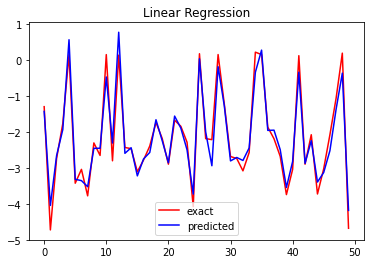

In [39]:
plott(df1, 'Mr_t', 'Mr_t_exp')
plt.title('Linear Regression')

Text(0.5, 1.0, 'Ridge')

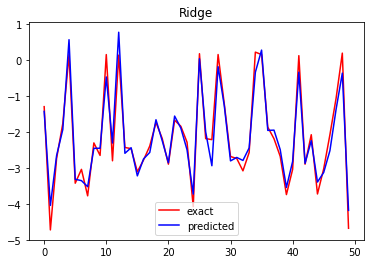

In [40]:
plott(df2, 'Mr_t', 'Mr_t_exp')
plt.title('Ridge')

Text(0.5, 1.0, 'Lasso')

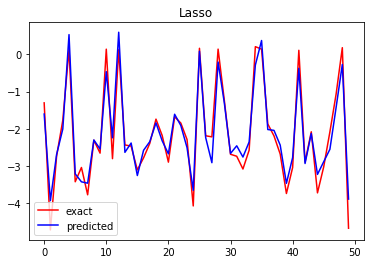

In [41]:
plott(df3, 'Mr_t', 'Mr_t_exp')
plt.title('Lasso')

Text(0.5, 1.0, 'Random Forest')

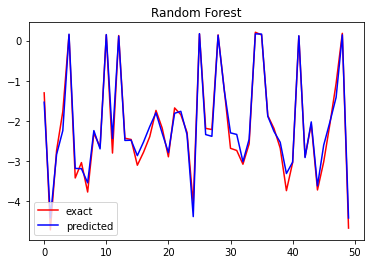

In [42]:
plott(df4, 'Mr_t', 'Mr_t_exp')
plt.title('Random Forest')

Text(0.5, 1.0, 'Random Forest with first hyperparameters')

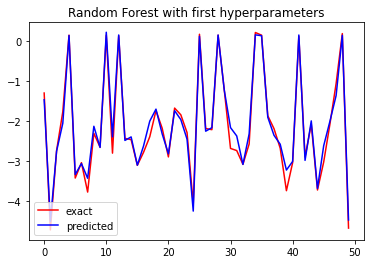

In [43]:
plott(df5, 'Mr_t', 'Mr_t_exp')
plt.title('Random Forest with first hyperparameters')

Text(0.5, 1.0, 'Random Forest with second hyperparameters')

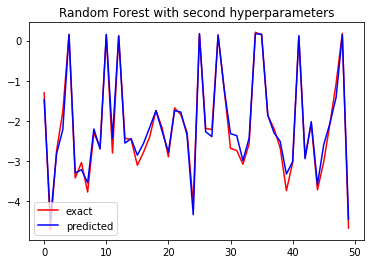

In [44]:
plott(df6, 'Mr_t', 'Mr_t_exp')
plt.title('Random Forest with second hyperparameters')

Text(0.5, 1.0, 'Decision Tree Regressor')

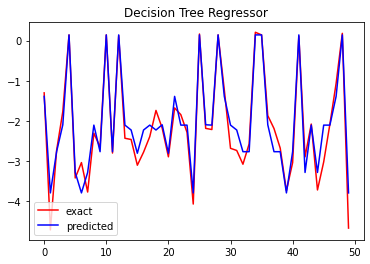

In [45]:
plott(df7, 'Mr_t', 'Mr_t_exp')
plt.title('Decision Tree Regressor')

Text(0.5, 1.0, 'Decision Tree Regressor with first hyperparameters')

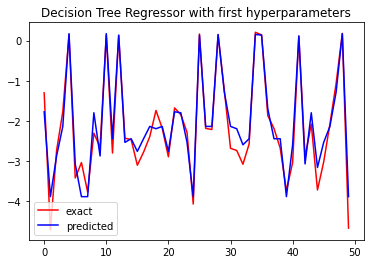

In [46]:
plott(df8, 'Mr_t', 'Mr_t_exp')
plt.title('Decision Tree Regressor with first hyperparameters')

Text(0.5, 1.0, 'Decision Tree Regressor with second hyperparameters')

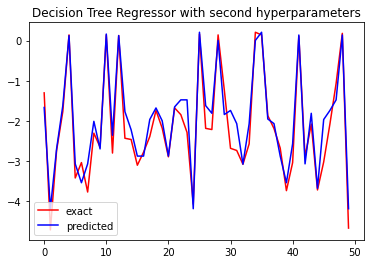

In [47]:
plott(df9, 'Mr_t', 'Mr_t_exp')
plt.title('Decision Tree Regressor with second hyperparameters')

Text(0.5, 1.0, 'Decision Tree Regressor with second hyperparameters')

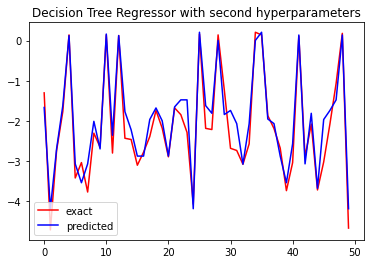

In [48]:
def plott(df, title1, title2):
    plt.plot(df[title1][:50], label = 'exact', color = 'red')
    plt.plot(df[title2][:50], label = 'predicted', color = 'blue')
    plt.legend()
    
plott(df9, 'Mr_t', 'Mr_t_exp')
plt.title('Decision Tree Regressor with second hyperparameters')

## Prediction using Feature Selection

### In this chapter, the values are predicted after selection and importance will be provided. 

In [49]:
rf = RandomForestRegressor(n_estimators = 40,
                                 min_samples_split = 2,
                                 min_samples_leaf = 1,
                                 max_features = 'auto',
                                 max_depth = 109,
                                 bootstrap = True)
rf.fit(X_train,y_train)
rf.feature_importances_

array([0.79979547, 0.17977418, 0.00176923, 0.00292412, 0.00170831,
       0.00677742, 0.00284966, 0.00279799, 0.00160362])

<BarContainer object of 9 artists>

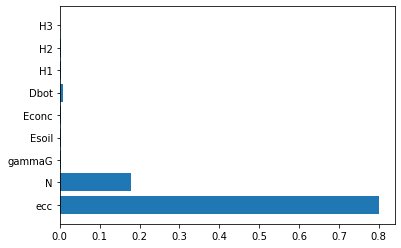

In [50]:
plt.barh(X_train.columns, rf.feature_importances_)

In [51]:
X_train_selected = X_train[['ecc', 'N', 'Dbot']]
X_test_selected = X_test[['ecc', 'N', 'Dbot']]

In [52]:
rf.fit(X_train_selected, y_train)
rf_pred_selected = rf.predict(X_test_selected)
rf_pred_selected

array([[-1.60304948, -0.65552848,  2.33326379,  1.52309178],
       [-4.58954041, -2.38427283,  6.25674275,  3.67781044],
       [-2.77054598, -1.52998457,  4.67806629,  2.64293427],
       ...,
       [ 0.11062664,  0.08000254,  0.11062664,  0.08000254],
       [-4.276754  , -2.25733519,  6.05249427,  3.50449306],
       [-1.95965855, -0.79943902,  2.2778067 ,  1.63549647]])

In [53]:
error_display(y_test, rf_pred_selected)

MAE: 0.11948748919746469
MSE: 0.03507748930097292
RMSE: 0.18728985370535403


In [54]:
pred_to_csv(rf_pred_selected)

In [55]:
df10 = pd.read_csv(r'new1.csv')

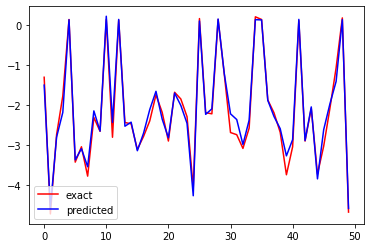

In [56]:
plott(df10, 'Mr_t', 'Mr_t_exp')

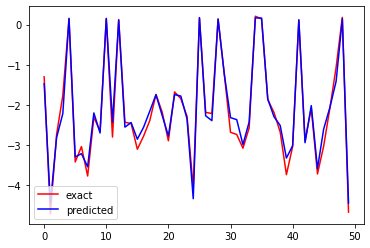

In [57]:
plott(df6, 'Mr_t', 'Mr_t_exp')

It is clear from here that the training set with selected features is better than another. 